In [2]:
import pandas as pd

## Import cleaned data

In [3]:
df = pd.read_csv("Mountains_Cleaned.csv")
df.set_index("Mountain", inplace=True)
df.head()

,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,
K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44
Kangchenjunga,8586,3922,Kangchenjunga Himalaya,1955,38,24
Lhotse,8516,610,Mahalangur Himalaya,1956,26,26
Makalu,8485,2386,Mahalangur Himalaya,1955,45,52
Cho Oyu,8188,2340,Mahalangur Himalaya,1954,79,28


## Compute metrics

In [6]:
df["Total attempts"] = df["Ascents bef. 2004"] + df["Failed attempts bef. 2004"]
df["Success rate"] = (df["Ascents bef. 2004"] / df["Total attempts"]) * 100
df["Difficulty"] = (df["Total attempts"] / df["Success rate"]) * 100

## Normalize metric - 'Difficulty'

In [7]:
df["Difficulty"] = df["Difficulty"] / df["Difficulty"].max()

## Sorting the data

In [9]:
df = df.sort_values(by="Difficulty", ascending=False)
df.head(10)

,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,Total attempts,Success rate,Difficulty
Mountain,,,,,,,,,
Nanga Parbat,8126,4608,Nanga Parbat Himalaya,1953,52,67,119,43.697479,1.000000
Makalu,8485,2386,Mahalangur Himalaya,1955,45,52,97,46.391753,0.767786
Annapurna I,8091,2984,Annapurna Himalaya,1950,36,47,83,43.373494,0.702689
Manaslu,8163,3092,Manaslu Himalaya,1956,49,45,94,52.127660,0.662169
K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44,89,50.561798,0.646364
Dhaulagiri I,8167,3357,Dhaulagiri Himalaya,1960,51,39,90,56.666667,0.583209
Cho Oyu,8188,2340,Mahalangur Himalaya,1954,79,28,107,73.831776,0.532169
Annapurna II,7937,2437,Annapurna Himalaya,1960,6,19,25,24.000000,0.382506
Lhotse,8516,610,Mahalangur Himalaya,1956,26,26,52,50.000000,0.381894


## Plotting

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = df.reset_index().set_index("Mountain")

### BARPLOT - Top 10 in difficulty

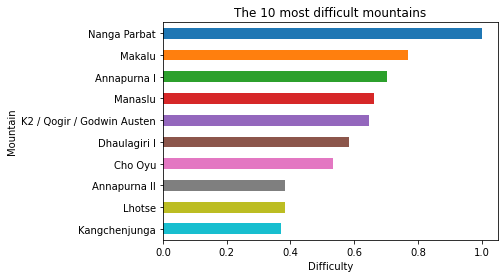

In [17]:
# Plot top 10 in difficulty
values = df[0:10]["Difficulty"]
colormap = plt.cm.tab10(range(0, len(values)))
bar_plot = values.plot.barh(color=colormap)

# Add titles, labels, invert y-axis
bar_plot = values.plot.barh(color=colormap)
bar_plot.set_title("The 10 most difficult mountains")
bar_plot.set_xlabel("Difficulty")
bar_plot.invert_yaxis()
plt.show(bar_plot)

### HISTOGRAM - First ascents

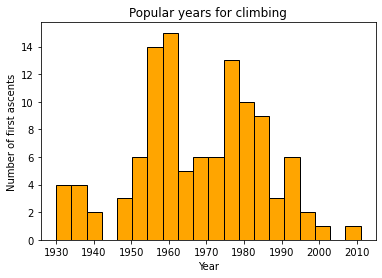

In [20]:
hist = df["First ascent"].plot.hist(bins=20, color="orange", edgecolor="black")
hist.set_xlabel("Year")
hist.set_ylabel("Number of first ascents")
hist.set_title("Popular years for climbing")
plt.show()

### HISTOGRAM - First ascents splitted by > 8000m

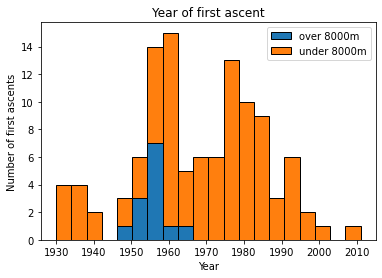

In [23]:
high = df["Height (m)"] > 8000
df.loc[~high, "First ascent"]

plt.hist(
    [df.loc[high, "First ascent"], df.loc[~high, "First ascent"]],
    stacked=True,
    edgecolor="black",
    bins=20,
)

plt.legend(["over 8000m", "under 8000m"], loc="upper right")
plt.xlabel("Year")
plt.ylabel("Number of first ascents")
plt.title("Year of first ascent")
plt.show()

### SCATTERPLOT - Heigth vs Total attemps

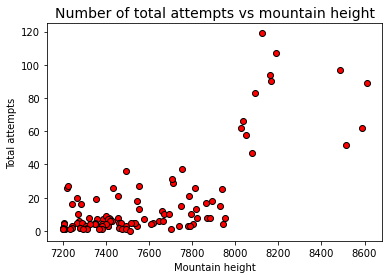

In [24]:
plt.scatter(df["Height (m)"], df["Total attempts"], color="red", edgecolor="black")
plt.ylabel("Total attempts")
plt.xlabel("Mountain height")
plt.title("Number of total attempts vs mountain height", fontsize=14)
plt.show()